# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [ ]:
import math
import sys

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [ ]:
# YOUR CODE HERE

red_wine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep = "\t")
red_wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
599,12.7,0.59,0.45,2.3,0.082,11.0,22.0,1.00000,3.00,0.70,9.3,6
1331,7.8,0.87,0.26,3.8,0.107,31.0,67.0,0.99668,3.26,0.46,9.2,5
1546,7.0,0.57,0.02,2.0,0.072,17.0,26.0,0.99575,3.36,0.61,10.2,5
1067,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7
975,7.2,0.41,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
50,8.8,0.66,0.26,1.7,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,5
1241,9.8,0.37,0.39,2.5,0.079,28.0,65.0,0.99729,3.16,0.59,9.8,5
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
231,8.0,0.38,0.06,1.8,0.078,12.0,49.0,0.99625,3.37,0.52,9.9,6
208,7.8,0.44,0.28,2.7,0.100,18.0,95.0,0.99660,3.22,0.67,9.4,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [ ]:
column_names = red_wine.columns
column_names
#len(column_names)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

This dataset has 11 continuous variable columns that describe the chemical characteristics of the wine sample:

- fixed acidity,
- volatile acidity,
- citric acid,
- residual sugar,
- chlorides,
- free sulfur dioxide,
- total sulfur dioxide,
- density,
- pH,
- sulphates,
- alcohol,

and has a final twelfth column detailing the target class. The target class is a wine-quality score that ranges from 0(very bad) to 10 (very excellent) as outlined in the metadata.  There are no missing values in the dataset and there are a total of 1599 observations.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

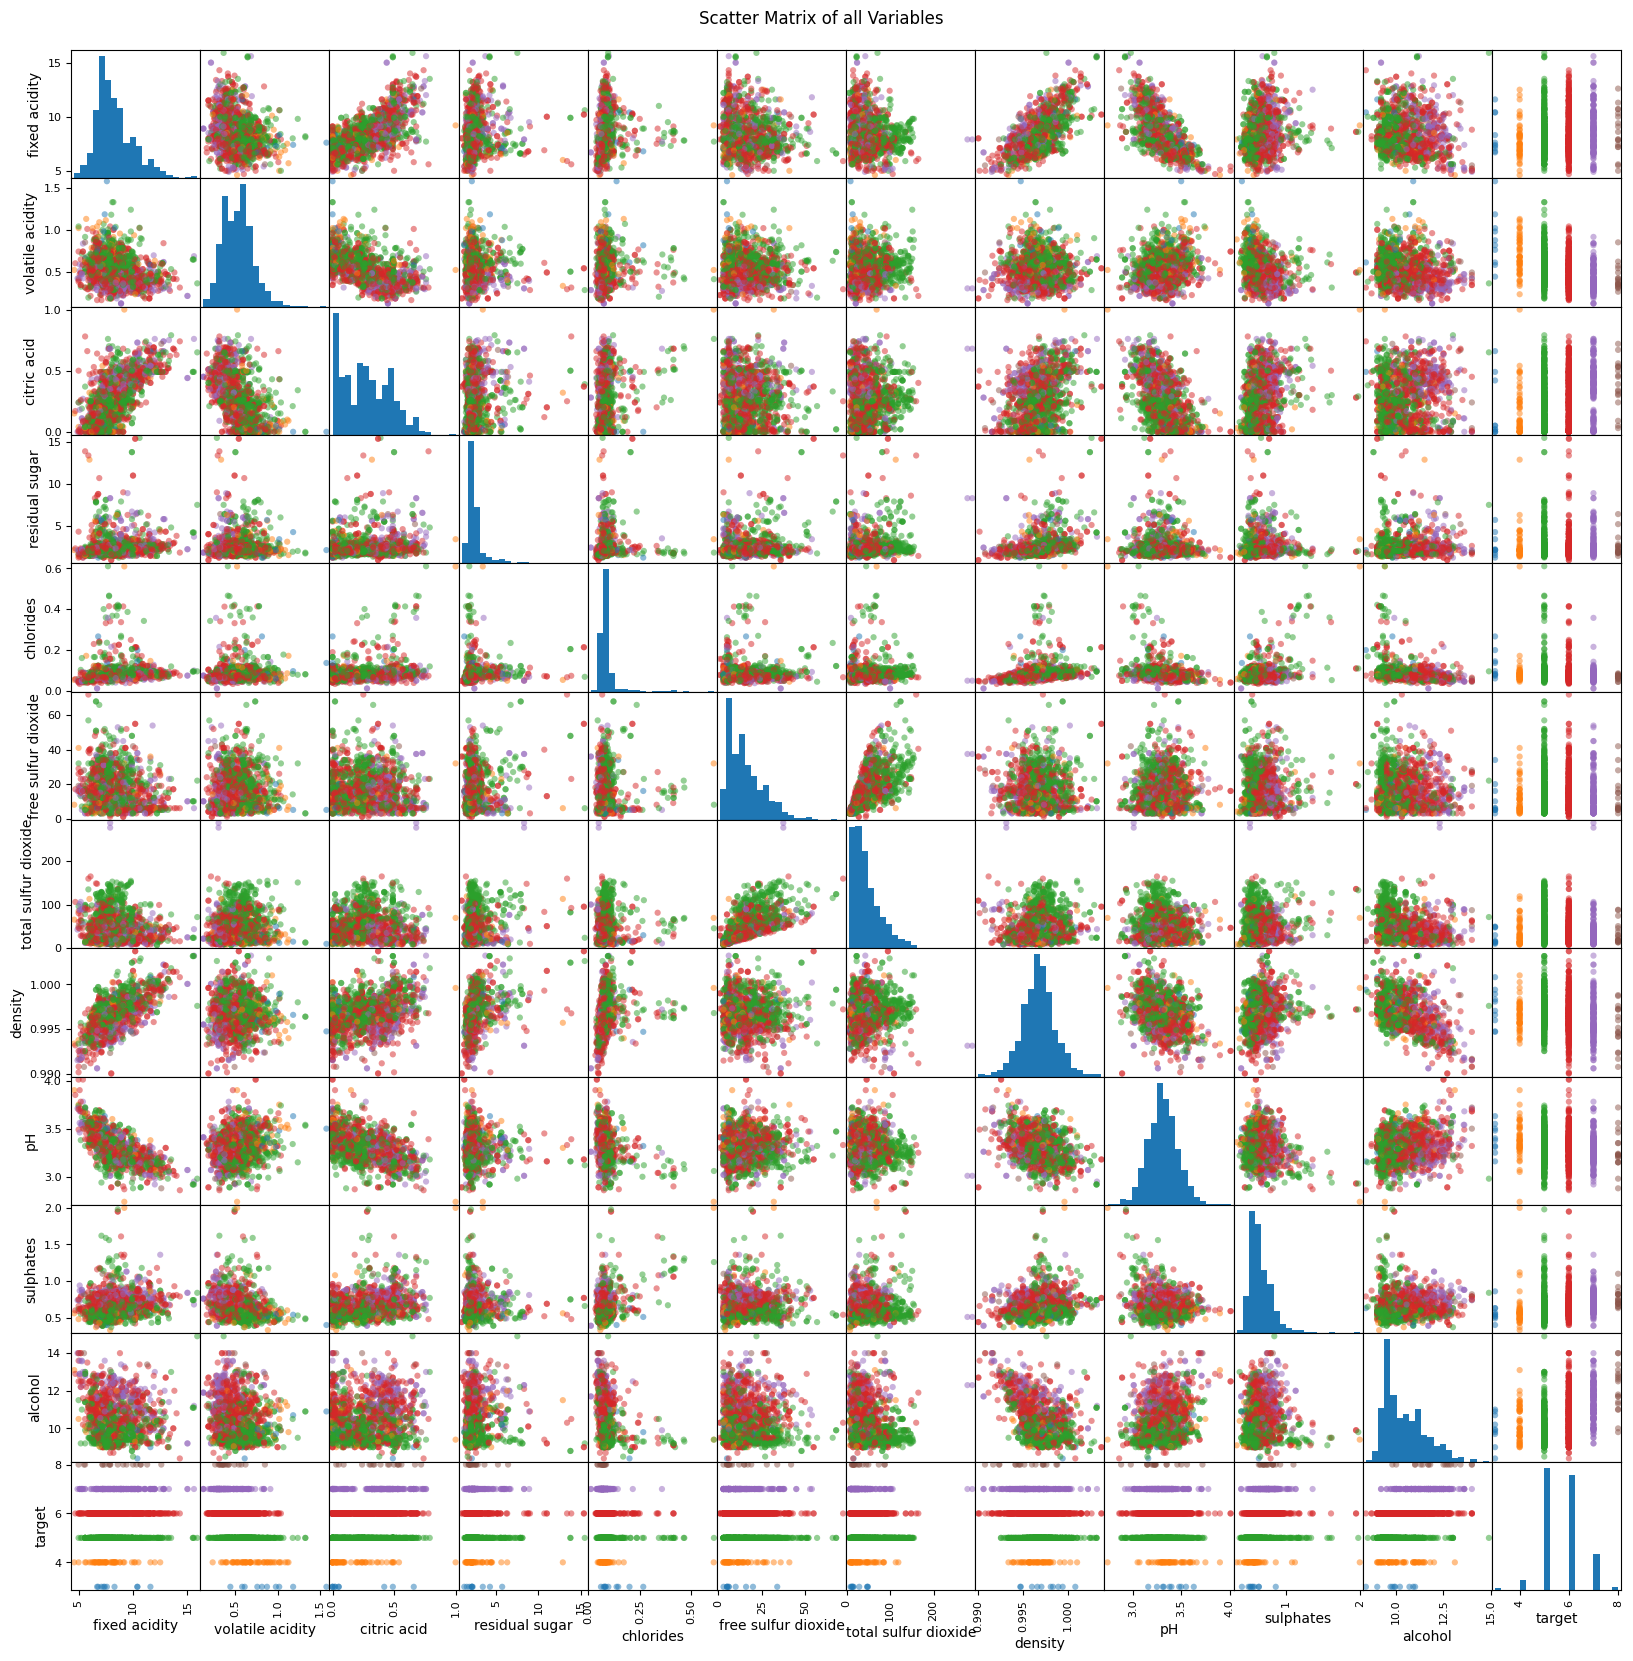

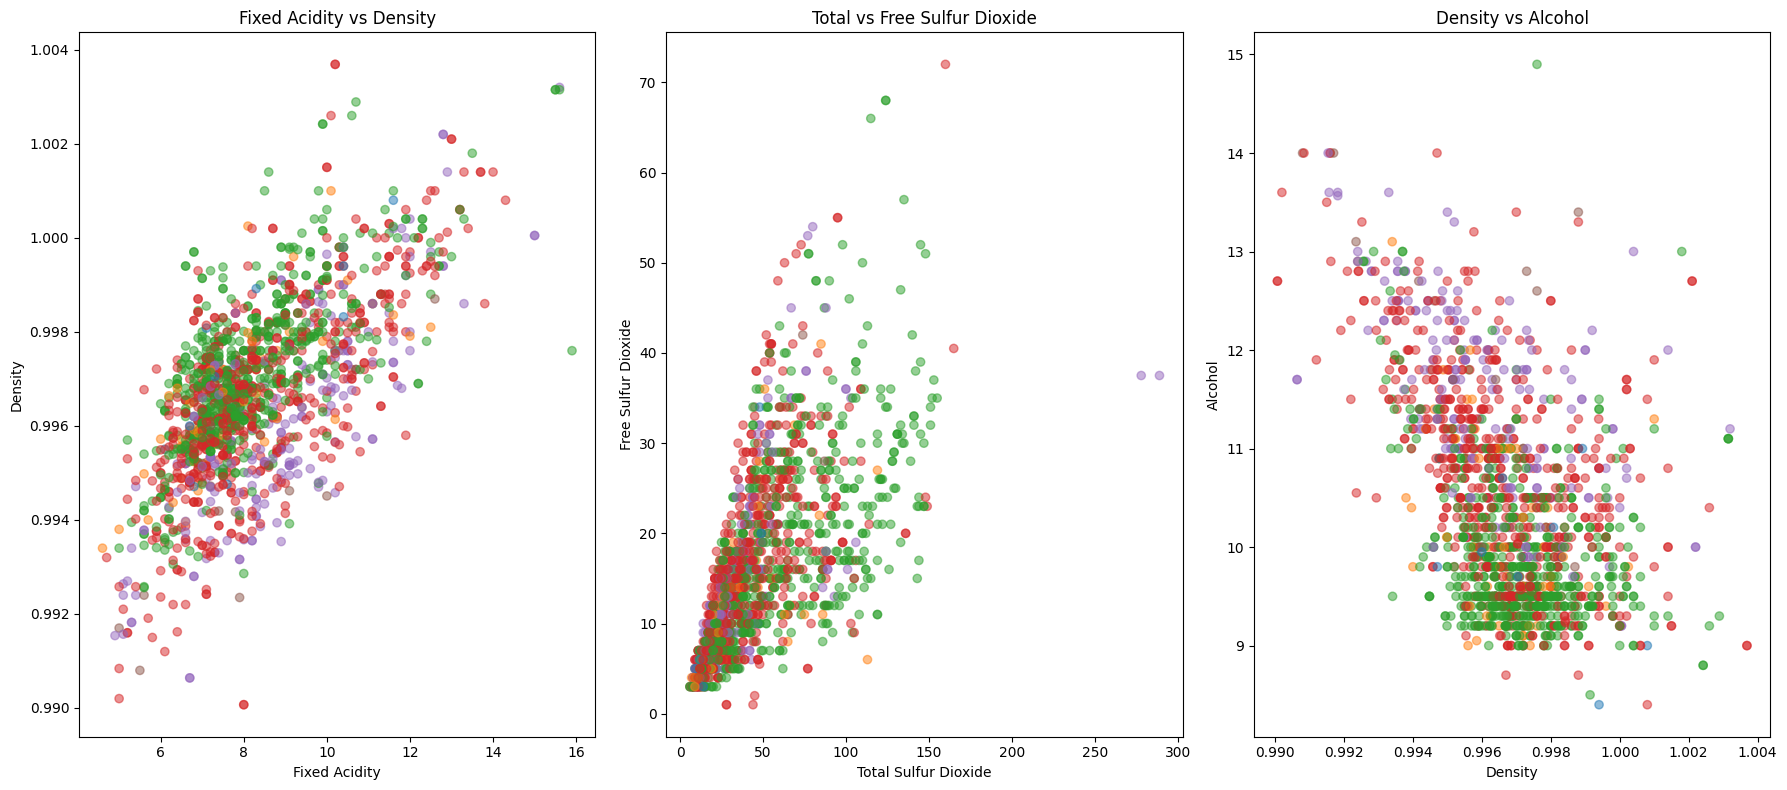

In [ ]:
# YOUR CODE HERE

#Exploratory Analysis
scatter_data = red_wine.copy()

unique_targets = sorted(scatter_data["target"].unique())
colors_cycle = plt.rcParams['axes.prop_cycle'].by_key()["color"]

color_mapping = dict(zip(unique_targets, colors_cycle))

point_colors = scatter_data["target"].map(color_mapping)

pd.plotting.scatter_matrix(
    scatter_data.select_dtypes(include=['number']),
    c=point_colors,
    figsize=(20, 20),
    marker='o',
    s=20,
    alpha=0.5,
    hist_kwds={'bins': 20}
)

plt.suptitle("Scatter Matrix of all Variables", y=0.90)
plt.show()


#Subplots of Interesting Features
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
plt.scatter(red_wine["fixed acidity"], red_wine["density"], alpha=0.5, c=point_colors, marker='o')
plt.xlabel("Fixed Acidity")
plt.ylabel("Density")
plt.title("Fixed Acidity vs Density")

plt.subplot(1, 3, 2)
plt.scatter(red_wine["total sulfur dioxide"], red_wine["free sulfur dioxide"], alpha=0.5, c=point_colors, marker='o')
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Free Sulfur Dioxide")
plt.title("Total vs Free Sulfur Dioxide")

plt.subplot(1, 3, 3)
plt.scatter(red_wine["density"], red_wine["alcohol"], alpha=0.5, c=point_colors, marker='o')
plt.xlabel("Density")
plt.ylabel("Alcohol")
plt.title("Density vs Alcohol")

plt.tight_layout()
plt.show()

I chose to use a scatter matrix as my method for exploratory analysis. The points are color mapped to their target value. I evaluated any interesting trends or groupings that

My criteria for picking the individual charts for analysis involved looking for any clear trends or separation in the target value based on certain variables. From this, the three pairings I chose to plot were 1) Fixed Acidity vs Density, 2) Total vs Free sulfur dioxide, and 3) Density vs Alcohol.

Fixed Acidity vs Density:

This plot indicates a linear relationship between fixed acidity and density. It seems as if when fixed acidity increases, density increases. Though, it’s important to note that the scale bar for density spans only 0.014. Interestingly, the target quality scores of 5, 6, and 7 seem to be distinct. The green market for the target score 5 are clustered more toward the left side of the plot, indicating lower fixed acidity and high density. Target score 6 seems to be somewhere in between, and target score 7 is favored to higher fixed acidity and lower density.

Total vs Free Sulfur Dioxide:

This plot also indicates a linear relationship between total and free sulfur dioxide where when total sulfur dioxide increases, free sulfur dioxide increases. I’ve noticed another distinction between green (target score 5) and red values (target score 6) in this plot. The green values are skewed more toward higher total sulfur dioxide, whereas, red remain near lower total sulfur dioxide.

Density vs Alcohol:

This plot was interesting as there is a clear gradient with a negative correlation between target score value across the alcohol vs density relationship. A higher target value contains a higher level of alcohol, and lower density whereas a mid range is somewhere in between, and a lower target value has a higher density and lower alcohol value.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

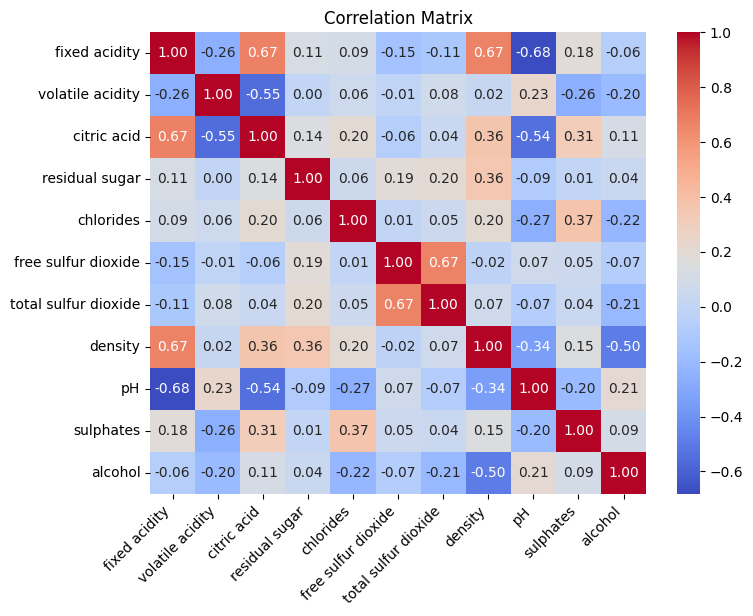

In [ ]:
# YOUR CODE HERE

import seaborn as sns
X = red_wine.drop(columns=['target'])
corr_matrix = X.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')
plt.show()


In the red wine dataset, there were three variable pairs that demonstrated a strong positive correlation with coefficients of r = 0.67. These include citric acid vs fixed acidity, density vs fixed acidity, and total vs free sulfur dioxide.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-linear-regression-with-examples

Decision Tree Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://www.geeksforgeeks.org/machine-learning/python-decision-tree-regression-using-sklearn/

Ridge Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://www.geeksforgeeks.org/machine-learning/what-is-ridge-regression/

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Model                          | L2 Loss (MSE)   | L1 Loss (MAE)  
------------------------------------------------------------------
Linear Regression              | 0.4168          | 0.5005
Decision Tree (Depth=5)        | 0.3502          | 0.4576
Ridge Regression (alpha=10)    | 0.4229          | 0.5042


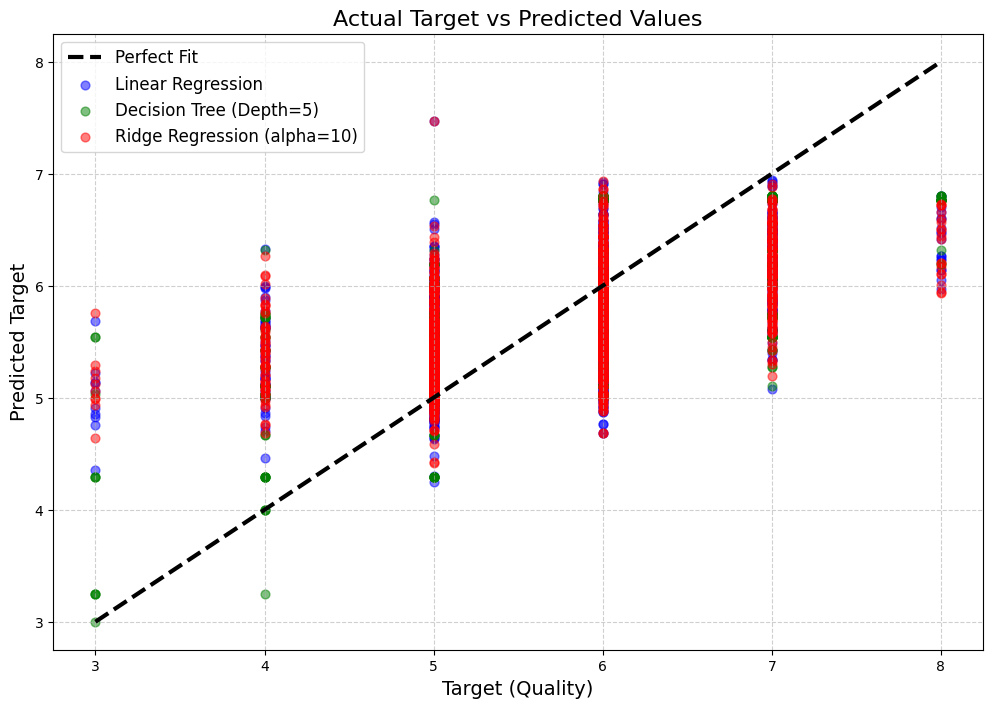

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

red_wine_target = red_wine["target"]
red_wine_features = red_wine.drop(columns=["target"], axis=1)

X = red_wine_features
y = red_wine_target

#Model 1: Linear Regression
model_1 = LinearRegression()

#Model 2: Decision Tree Regressor
model_2 = DecisionTreeRegressor(max_depth=5, random_state=50)

#Model 3: Ridge Regression
model_3 = Ridge(alpha=10.0)

models = {
    "Linear Regression": model_1,
    "Decision Tree (Depth=5)": model_2,
    "Ridge Regression (alpha=10)": model_3
}

#Fitting models
plt.figure(figsize=(12, 8))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Perfect Fit')

#mse = mean squared error
#mae = mean absolute error
print(f"{'Model':<30} | {'L2 Loss (MSE)':<15} | {'L1 Loss (MAE)':<15}")
print("-" * 66)

colors = ['blue', 'green', 'red']
for (name, model), color in zip(models.items(), colors):
    model.fit(X, y)
    y_pred = model.predict(X)
    l2_loss = mean_squared_error(y, y_pred)
    l1_loss = mean_absolute_error(y, y_pred)

    print(f"{name:<30} | {l2_loss:.4f}          | {l1_loss:.4f}")
    plt.scatter(y, y_pred, alpha=0.5, label=name, color=color, s=40)


plt.title('Actual Target vs Predicted Values', fontsize=16)
plt.xlabel('Target (Quality)', fontsize=14)
plt.ylabel('Predicted Target', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


From my three chosen models, the Linear Regression model yielded a L2 Loss of 0.4168 and the L1 Loss of 0.5005, the Decision Tree model, with a depth of 5, yielded a L2 loss of 0.3502 and a L1 loss of 0.4576, and finally, the Ridge Regression model, yielded a L2 loss of 0.4229 and a L1 loss of 0.5042.

Therefore, the Decision Tree model demonstrated the best performance with the lowest mean absolute and mean squared errors. Though, decision tree models are prone to overfitting.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import KFold, cross_val_score

red_wine_target = red_wine["target"]
red_wine_features = red_wine.drop(columns=["target"], axis=1)

X = red_wine_features
y = red_wine_target

#Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree (Depth=5)": DecisionTreeRegressor(max_depth=5, random_state=50),
    "Ridge Regression (alpha=10)": Ridge(alpha=10.0)}

#Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)

print(f"{'Model':<30} | {'L2 Loss (MSE)':<20}")


for name, model in models.items():
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    print(f"{name:<30} | {mean_mse:.4f}")

Model                          | L2 Loss (MSE)       
Linear Regression              | 0.4257
Decision Tree (Depth=5)        | 0.4816
Ridge Regression (alpha=10)    | 0.4304


After performing a 5-fold cross validation on the models, there was a large increase in the L2 loss of the decision tree model from an original L2 score from the whole dataset of 0.3502 to the cross-validated L2 score of 0.4816. The discrepancy of 0.1314 validates my concern from Problem 6 that that the model would be overfit in the previous question.

The cross-validation revealed little differences in the scores of the Linear and Ridge Regression models, indicating that these models generalize on unseen data.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

#defining the data
X = red_wine.drop(columns=['target'])
y = red_wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#defining the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree (Depth=5)": DecisionTreeRegressor(max_depth=5, random_state=50),
    "Ridge Regression (alpha=10)": Ridge(alpha=10.0)}
print(f"{'Model':<25} | {'L2 Loss (MSE)':<15}")

#creating the pipeline
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    l2_loss = mean_squared_error(y_test, y_pred)
    print(f"{name:<30} | {l2_loss:.4f}")


Model                     | L2 Loss (MSE)  
Linear Regression              | 0.4165
Decision Tree (Depth=5)        | 0.4634
Ridge Regression (alpha=10)    | 0.4161


The L2 loss scores for the linear regression model are nearly identical, with only a difference of 0.003. This result is expected as scaling the data is not typically thought to affect the oridinary least squares solution for linear regression, as scaling the data changes the magnitude of the coefficients but does not change the trend.

The ridge model performed differently on unscaled vs scaled data where the original L2 score was 0.4229 and improved to 0.4161 when scaled. Ridge regression usually yields best results on scaled data, allowing the L2 loss to interpret variables with equal weight.

The decision tree model had the largest variation when performed on scaled data, with the original L2 loss of 0.3502 increasing to 0.4634. The scaled data yields the more accurate L2 score as it performed better on unseen data, whereas it is likely that the original model memorised the visible data.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion.

In [ ]:
# YOUR CODE HERE

Thank you for this suggestion, but testing 1000 random models will unfavourably lead to overfitting the cross validation data and will likely lead to poor performance on unseen test data.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set.

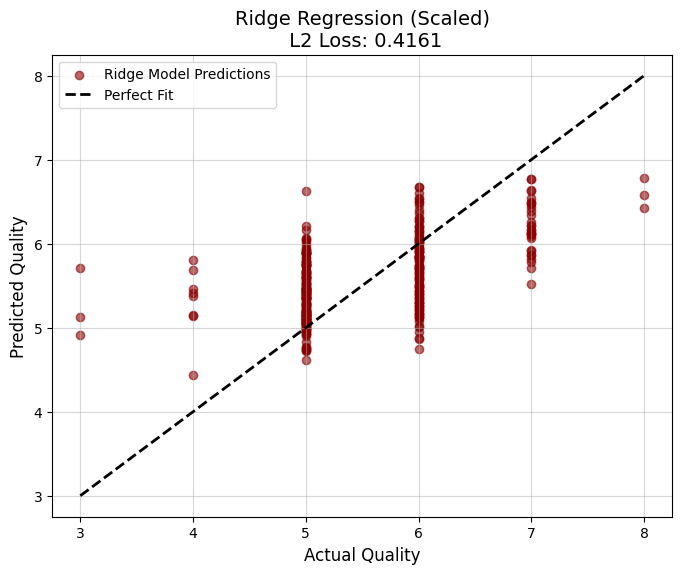

In [ ]:
# YOUR CODE HERE
#visual example of best model
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=10.0))
ridge_pipeline.fit(X_train, y_train)

y_pred_ridge = ridge_pipeline.predict(X_test)

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='darkred', label='Ridge Model Predictions')

min_val = min(y_test.min(), y_pred_ridge.min())
max_val = max(y_test.max(), y_pred_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Quality', fontsize=12)
plt.ylabel('Predicted Quality', fontsize=12)
plt.title(f'Ridge Regression (Scaled)\n L2 Loss: {mean_squared_error(y_test, y_pred_ridge):.4f}', fontsize=14)
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

Best Model: Ridge Regression

The criteria I selected for choosing the best model is which model yielded the lowest L2 loss on the test data, as shown by my final train test split analysis on the scaled data. I believe that this is the most direct measure of predictive accuracy as it measures the average squared error between the model's predictions and true values.

By this metric, the ridge regression model was the best performing model out of my three choices. The final L2 score for this model on the test data was 0.4161. In comparison to the narrowly second-best performing linear regression model (0.4165), ridge regression models better handle L2 regularization, bias-variance tradeoff, multicollinearity, and generalization (GeeksforGeeks, 2025). The decision tree model performed the worst (0.4634) on these data and was not a suitable model for the linear relationships seen throughout the dataset.

The red wine dataset contains features of vastly different scales, such as fixed acidity vs chlorides. Standardizing the data allows for the L2 penalty to be fairly applied to all coefficients, which lead to the better performance over the linear regression model. This model was able to capture linear relationships, which were visible in my exploratory scatter plot analysis, and reduce the noise of less informative variables.